<a href="https://colab.research.google.com/github/Sbosaty/advanced-algorithms-tasks/blob/main/MLfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

import pandas as pd
file_path = "train.csv"
train = pd.read_csv(file_path)
print(train.head())


Saving train.csv to train.csv
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural     

In [ ]:
import numpy as np

new_rows_count = 1000 - train.shape[0]

augmented_data = train.sample(new_rows_count, replace=True).copy()

for column in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
    augmented_data[column] += np.random.normal(0, 500, size=augmented_data.shape[0])

augmented_data = pd.concat([train, augmented_data], ignore_index=True)

print("New dataset size:", augmented_data.shape)


New dataset size: (1000, 13)


In [ ]:
augmented_data.to_csv("augmented_train.csv", index=False)
print("Augmented dataset saved as 'augmented_train.csv'.")


Augmented dataset saved as 'augmented_train.csv'.


In [ ]:
from google.colab import files

files.download("augmented_train.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
train = pd.read_csv("augmented_train.csv")
print("Loaded augmented dataset!")


Loaded augmented dataset!


classification problem:

first algorithm (Logistic Regression) predicts the probability of the target variable being in a particular class.

making sure that the dataset is uploaded succesfully


In [ ]:

import pandas as pd

train = pd.read_csv('augmented_train.csv')
print("Dataset uploaded successfully! Here's a preview:")
print(train.head())


Dataset uploaded successfully! Here's a preview:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           5849.0                0.0         NaN             360.0   
1           4583.0             1508.0       128.0             360.0   
2           3000.0                0.0        66.0             360.0   
3           2583.0             2358.0       120.0             360.0   
4           6000.0                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0



1. checking how many rows and columns are in the dataset
2.  a quick summary for the data
3.  checking for missing values







In [ ]:

print("Dataset Shape:", train.shape)

print("Dataset Info:")
print(train.info())


print("\nMissing Values in Each Column:")
print(train.isnull().sum())


Dataset Shape: (1000, 13)
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            1000 non-null   object 
 1   Gender             979 non-null    object 
 2   Married            995 non-null    object 
 3   Dependents         974 non-null    object 
 4   Education          1000 non-null   object 
 5   Self_Employed      953 non-null    object 
 6   ApplicantIncome    1000 non-null   float64
 7   CoapplicantIncome  1000 non-null   float64
 8   LoanAmount         963 non-null    float64
 9   Loan_Amount_Term   980 non-null    float64
 10  Credit_History     923 non-null    float64
 11  Property_Area      1000 non-null   object 
 12  Loan_Status        1000 non-null   object 
dtypes: float64(5), object(8)
memory usage: 101.7+ KB
None

Missing Values in Each Column:
Loan_ID               0
Gender             

handiling missing values:
1.  CategoricalColumns: Missing values are replaced with the #Mode (most frequent value).
2.  NumericalColumns: Missing values are replaced with the #Mean (average value).

3.   Ensures the dataset is complete and ready for analysis or modeling without losing data






In [ ]:
for column in train.columns:
    if train[column].dtype == 'object':
        train[column].fillna(train[column].mode()[0], inplace=True)
    else:
        train[column].fillna(train[column].mean(), inplace=True)

print("Missing values filled successfully!")
print(train.isnull().sum())


Missing values filled successfully!
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


<ipython-input-22-686cc7d0b44d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[column].fillna(train[column].mode()[0], inplace=True)
<ipython-input-22-686cc7d0b44d>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

i am making sure that the dataset is balanceed
which means there are y's and n's aka approved loans and not approved loans. in this case it is balanced as shown

In [ ]:
print("Target Variable Distribution:")
if 'Loan_Status' in train.columns:
    print(train['Loan_Status'].value_counts())
else:
    print("Please confirm the name of the target variable.")


Target Variable Distribution:
Loan_Status
Y    664
N    336
Name: count, dtype: int64


changing non numerical to numbers so that the machine learning can do the visualization.
# labelencoder: changes any nonnumerical to zero,s and one,s

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for column in train.select_dtypes(include=['object']).columns:
    train[column] = label_encoder.fit_transform(train[column])

print("Categorical columns encoded successfully!")


Categorical columns encoded successfully!


In [ ]:
y_pred_lr = model.predict(X_test_scaled)

print("Logistic Regression predictions completed!")



Logistic Regression predictions completed!


In [ ]:
accuracy_lr = accuracy_score(y_test, y_pred_lr) * 100
print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}%")


Logistic Regression Accuracy: 81.33%


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


 1 - Loan Approved
 0 - Loan Not Approved
 This is the target variable for predicting loan approval.

<ipython-input-26-bdcefc996451>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x='Loan_Status', palette='viridis')


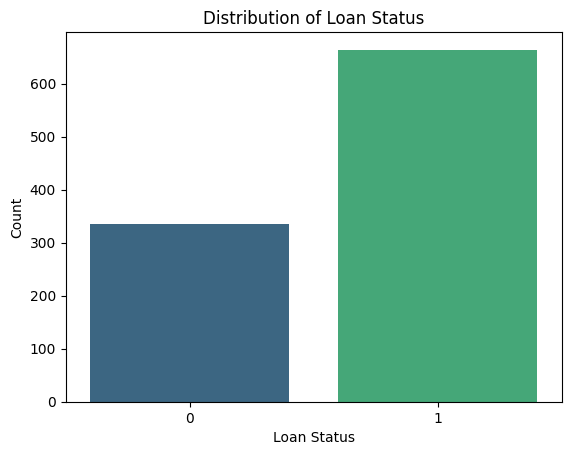

In [ ]:
sns.countplot(data=train, x='Loan_Status', palette='viridis')
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()


// heatmap

---

1: Perfect positive correlation (both variables increase together) Light Red to Dark Red.

-1: Perfect negative correlation (one variable increases, the other   decreases) Dark Blue.

0: No correlation Light Blue to White .



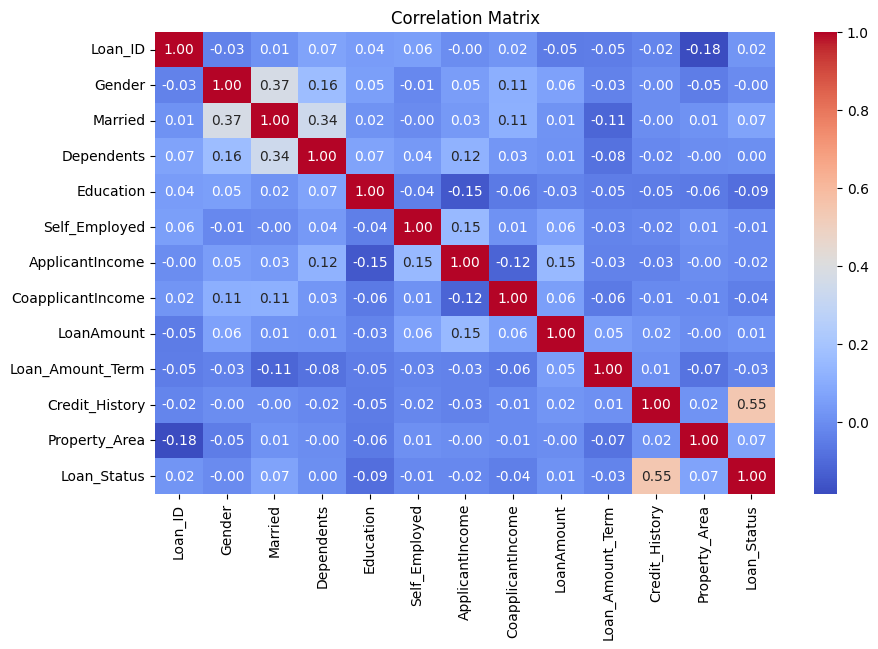

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


blue not approved
purpel approved

0: Rural

1: Semiurban

2: Urban

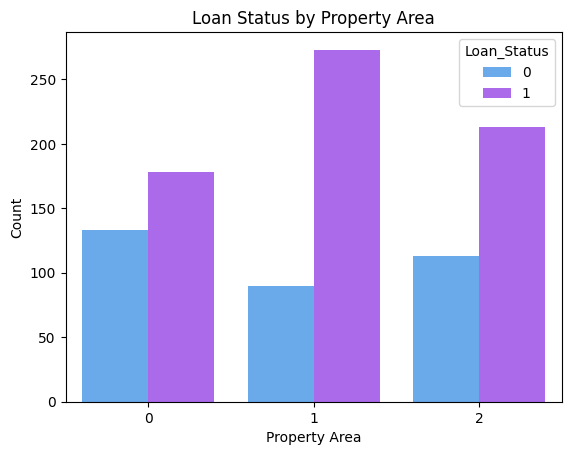

In [ ]:
sns.countplot(data=train, x='Property_Area', hue='Loan_Status', palette='cool')
plt.title('Loan Status by Property Area')
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.show()


0: No credit history (or bad credit history). also not approved/ orange

0.8:  intermediary score

1: Good credit history. approved/green

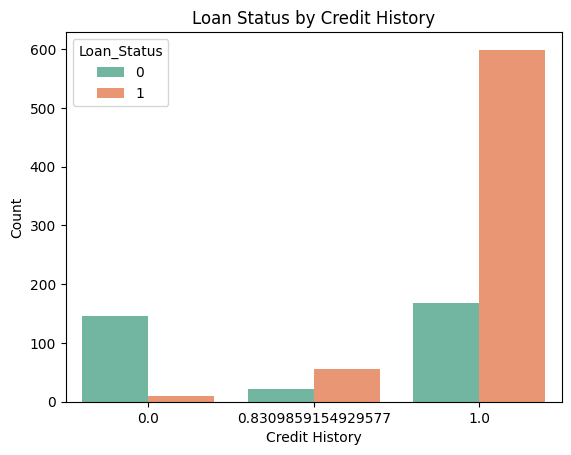

In [ ]:
sns.countplot(data=train, x='Credit_History', hue='Loan_Status', palette='Set2')
plt.title('Loan Status by Credit History')
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.show()


spliting the data into training and testing sets

why  

To train the model using the training set (70% of the data).

To test the model on unseen data using the testing set (30% of the data).

Ensures the model learns patterns from training data and is evaluated fairly on test data.

In [ ]:
from sklearn.model_selection import train_test_split

X = train.drop(columns=['Loan_Status'])
y = train['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Data split into training and testing sets successfully!")
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Data split into training and testing sets successfully!
Training set size: (700, 12)
Testing set size: (300, 12)


Why:
Machine learning models can't process text, so we need to turn categories (Male, Female) into numbers (0, 1).

Key points:
Applied to both training and testing sets to ensure consistency.
Ensures the model can work with all features correctly.

In [ ]:
from sklearn.preprocessing import LabelEncoder

for column in X_train.select_dtypes(include=['object']).columns:
    label_encoder = LabelEncoder()
    X_train[column] = label_encoder.fit_transform(X_train[column])
    X_test[column] = label_encoder.transform(X_test[column])

print("Categorical columns encoded successfully!")


Categorical columns encoded successfully!


Why:
Many machine learning models perform better when the data is scaled

Key points:
Applied scaling separately to training and testing data.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

print("Data scaled successfully!")


Data scaled successfully!


making sure that after scalling there is no missing values from x-train and test

In [ ]:
print("Missing values in X_train_scaled:")
print(X_train_scaled.isnull().sum())

print("Missing values in X_test_scaled:")
print(X_test_scaled.isnull().sum())


Missing values in X_train_scaled:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64
Missing values in X_test_scaled:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


Why:
To handle any remaining missing values after scaling to ensure the data is clean and ready for training.

Key points:

Missing values in numeric columns were replaced with the column mean.

i included a verification step to confirm no missing values remain in the datasets.

In [ ]:

for column in X_train_scaled.columns:
    if X_train_scaled[column].dtype == 'float64':
        X_train_scaled[column].fillna(X_train_scaled[column].mean(), inplace=True)

for column in X_test_scaled.columns:
    if X_test_scaled[column].dtype == 'float64':
        X_test_scaled[column].fillna(X_test_scaled[column].mean(), inplace=True)

print("Remaining missing values in X_train_scaled:")
print(X_train_scaled.isnull().sum())


Remaining missing values in X_train_scaled:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


<ipython-input-34-0e4f5dac9645>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train_scaled[column].fillna(X_train_scaled[column].mean(), inplace=True)
<ipython-input-34-0e4f5dac9645>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

Why:
Training the model allows it to learn patterns in the data to predict outcomes for new, unseen data.

Key points:

The model learns the relationship between the input features (X_train_scaled) and the target variable (y_train).

The max_iter=1000 ensures the model has sufficient iterations if needed.

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

print("Model trained successfully!")


Model trained successfully!


In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

print("Model trained successfully!")


Model trained successfully!


In [ ]:
y_pred = model.predict(X_test_scaled)

print("Predictions completed!")


Predictions completed!



Key points:

Accuracy: Shows the overall success rate of the predictions.

Precision: Measures how many predicted positives were actually correct.

Recall: how many actual positives were correctly predicted.

F1-score: balancing both metrics.

Confusion Matrix: Helps identify where the model is making errors predicting Yes instead of No

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 81.33%
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.44      0.60        96
           1       0.79      0.99      0.88       204

    accuracy                           0.81       300
   macro avg       0.87      0.71      0.74       300
weighted avg       0.84      0.81      0.79       300

Confusion Matrix:
[[ 42  54]
 [  2 202]]


Confusion Matrix Heatmap:

Rows represent the actual classes (0 and 1).

Columns represent the predicted classes (0 and 1).

Diagonal cells (top-left and bottom-right): Correct predictions.

Off-diagonal cells (top-right and bottom-left): Incorrect predictions.

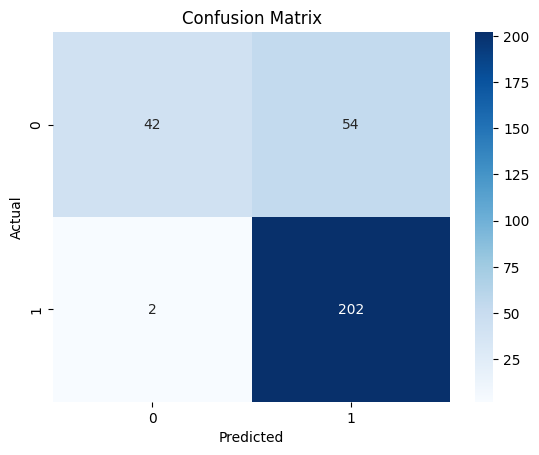

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


augumented the dataset to be atleat 1000 rows

Steps Completed So Far (Classification Problem)

Loaded the Dataset:

Explored the Data:

Handled Missing Values:

Encoded Categorical Data:

Split the Data:

Divided the dataset into:

Scaled the Data:

Trained the Logistic Regression Model:

Made Predictions:

Evaluated the Model:

Visualized the Confusion Matrix:


RANDOM FOREST ALGORITHM

Combines multiple decision trees to improve accuracy and prevent overfitting.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

random_forest_model.fit(X_train_scaled, y_train)

print("Random Forest model trained successfully!")


Random Forest model trained successfully!


In [ ]:
y_pred_rf = random_forest_model.predict(X_test_scaled)

print("Predictions completed!")


Predictions completed!


Evaluate the Model

We measure how well the model performs using,

Accuracy

Classification Report: (loan approved or not).

Confusion Matrix: A table summarizing the prediction results (correct and incorrect) for each class.

In [ ]:
accuracy_rf = accuracy_score(y_test, y_pred_rf) * 100


In [ ]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf * 100:.2f}%")

print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Accuracy: 88.00%
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.68      0.78        96
           1       0.87      0.98      0.92       204

    accuracy                           0.88       300
   macro avg       0.90      0.83      0.85       300
weighted avg       0.89      0.88      0.87       300

Confusion Matrix:
[[ 65  31]
 [  5 199]]


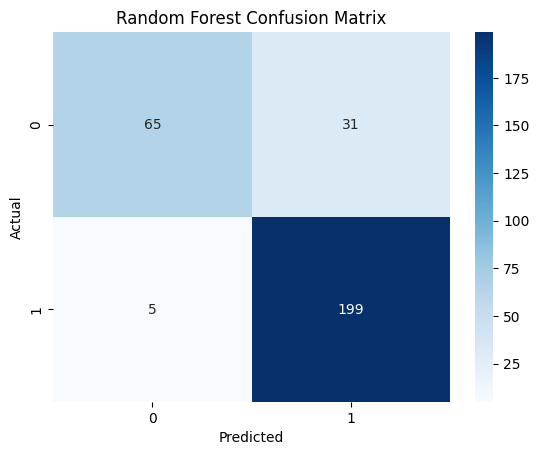

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


 trade-off between precision and recall at various threshold levels.

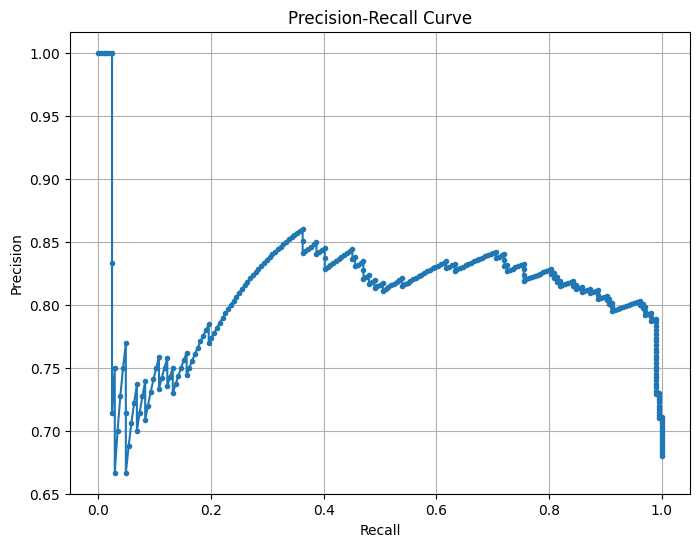

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

y_scores = model.predict_proba(X_test_scaled)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.show()


Decision Tree Classifier

Creates a tree-like structure to make decisions by splitting the data based on rules.


train the model


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(random_state=42)
model_tree.fit(X_train_scaled, y_train)
print("Decision Tree model trained successfully!")


Decision Tree model trained successfully!


In [ ]:
y_pred_tree = model_tree.predict(X_test_scaled)
print("Decision Tree predictions generated successfully!")


Decision Tree predictions generated successfully!


In [ ]:
print("First 10 predictions for Decision Tree:", y_pred_tree[:10])


First 10 predictions for Decision Tree: [1 0 0 0 0 0 1 1 1 1]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

print("Decision Tree model trained successfully!")


Decision Tree model trained successfully!


In [ ]:
y_pred_dt = dt_model.predict(X_test_scaled)
print("Predictions completed for Decision Tree!")


Predictions completed for Decision Tree!


In [ ]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt * 100:.2f}%")

print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))


Decision Tree Accuracy: 79.00%
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.70      0.68        96
           1       0.85      0.83      0.84       204

    accuracy                           0.79       300
   macro avg       0.76      0.77      0.76       300
weighted avg       0.79      0.79      0.79       300

Confusion Matrix:
[[ 67  29]
 [ 34 170]]


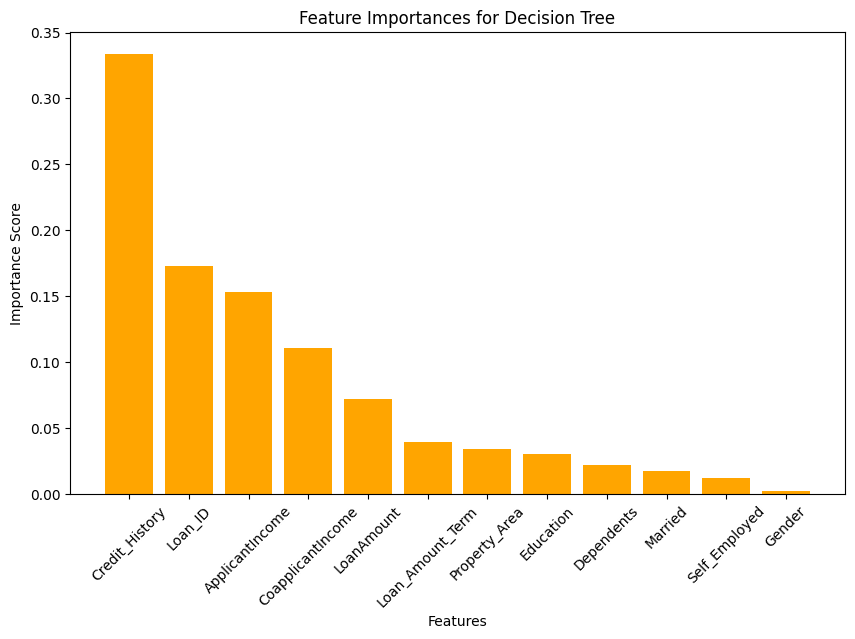

In [ ]:
import pandas as pd

feature_importance_dt = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance_dt['Feature'], feature_importance_dt['Importance'], color='orange')
plt.title('Feature Importances for Decision Tree')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=45)
plt.show()


SVM MODEL

machine learning algorithm used for classification. Its goal is to draw a line (or boundary) that best separates two groups of data points (e.g., "loan approved" vs. "loan not approved").

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', random_state=42)

svm_model.fit(X_train_scaled, y_train)

print("SVM model trained successfully!")


SVM model trained successfully!


In [ ]:
y_pred_svm = svm_model.predict(X_test_scaled)

print("SVM predictions completed!")


SVM predictions completed!


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")

print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))


SVM Accuracy: 81.33%
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.44      0.60        96
           1       0.79      0.99      0.88       204

    accuracy                           0.81       300
   macro avg       0.87      0.71      0.74       300
weighted avg       0.84      0.81      0.79       300

SVM Confusion Matrix:
[[ 42  54]
 [  2 202]]


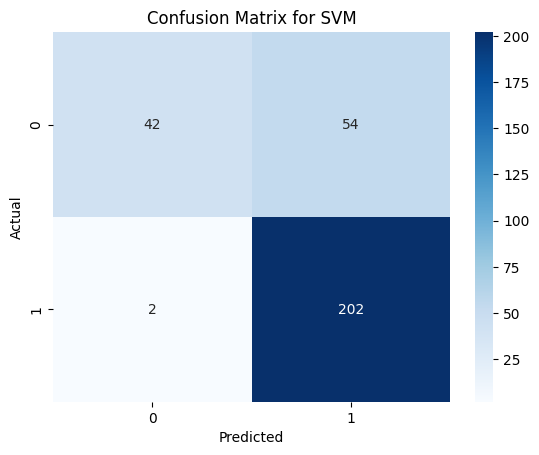

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Naive Bayes Classifier

Makes predictions based on probabilities, assuming all features are independent.



Naive Bayes Accuracy: 81.67%
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.94      0.46      0.62        96
           1       0.79      0.99      0.88       204

    accuracy                           0.82       300
   macro avg       0.87      0.72      0.75       300
weighted avg       0.84      0.82      0.80       300



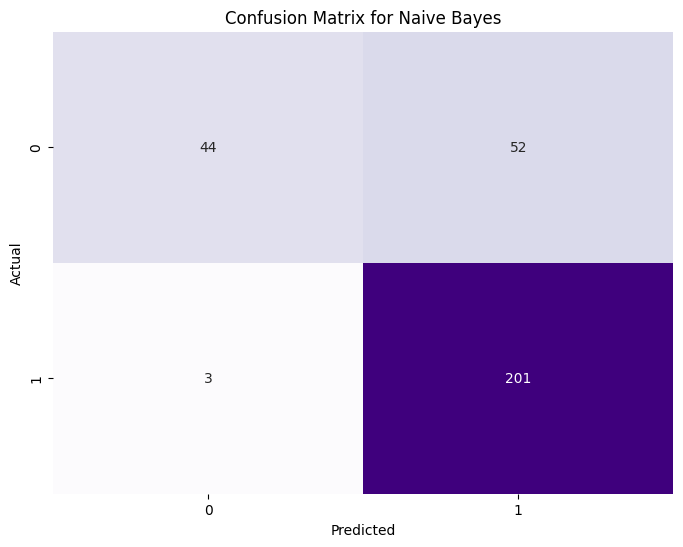

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#train
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_scaled, y_train)

#predictions
y_pred_nb = naive_bayes.predict(X_test_scaled)

#Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb * 100:.2f}%")

print("Classification Report for Naive Bayes:")
print(classification_report(y_test, y_pred_nb))

#Heatmap
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Neural Network model

 Mimics the human brain with interconnected layers of "neurons" to learn patterns in the data.





/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network Accuracy: 84.00%
Classification Report for Neural Network:
              precision    recall  f1-score   support

           0       0.74      0.77      0.76        96
           1       0.89      0.87      0.88       204

    accuracy                           0.84       300
   macro avg       0.81      0.82      0.82       300
weighted avg       0.84      0.84      0.84       300



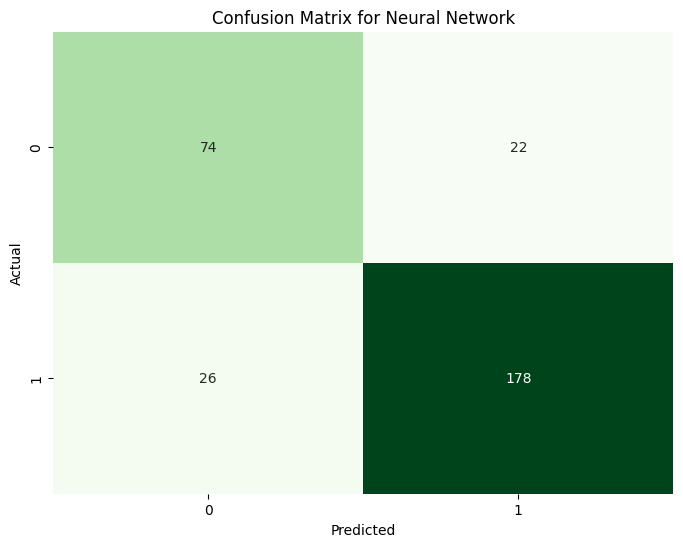

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

# Train
nn_model.fit(X_train_scaled, y_train)

#predictions
y_pred_nn = nn_model.predict(X_test_scaled)

#Evaluate the model
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print(f"Neural Network Accuracy: {accuracy_nn * 100:.2f}%")

print("Classification Report for Neural Network:")
print(classification_report(y_test, y_pred_nn))

conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nn, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix for Neural Network')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3)
grid_search.fit(X_train_scaled, y_train)

print(f"Best parameters for Random Forest: {grid_search.best_params_}")
best_rf = grid_search.best_estimator_

# Evaluate with the best model
y_pred_rf_tuned = best_rf.predict(X_test_scaled)
print(f"Tuned Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf_tuned) * 100:.2f}%")


Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Tuned Random Forest Accuracy: 87.33%


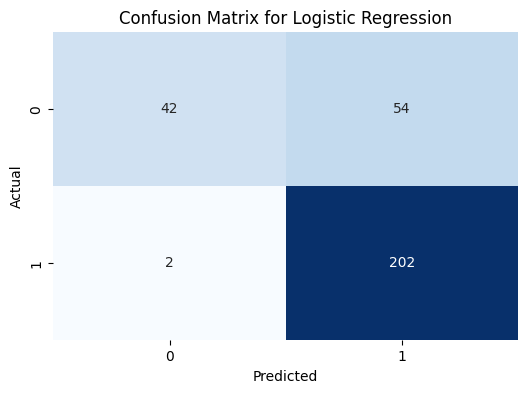

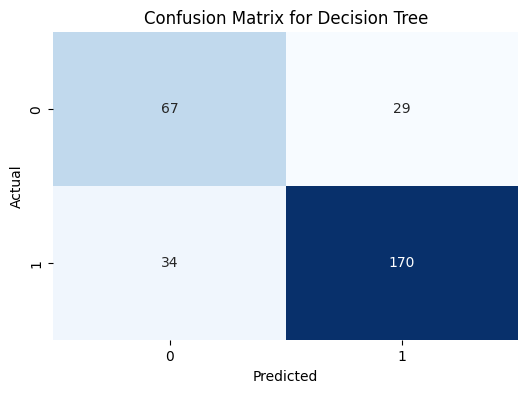

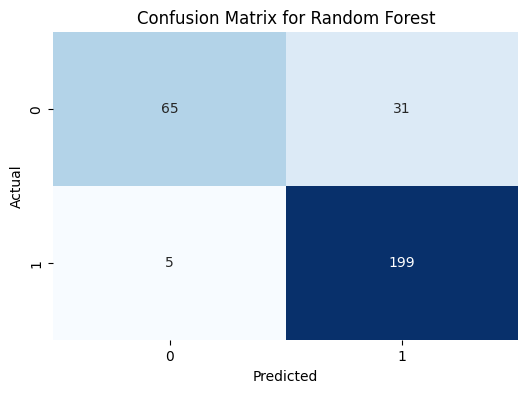

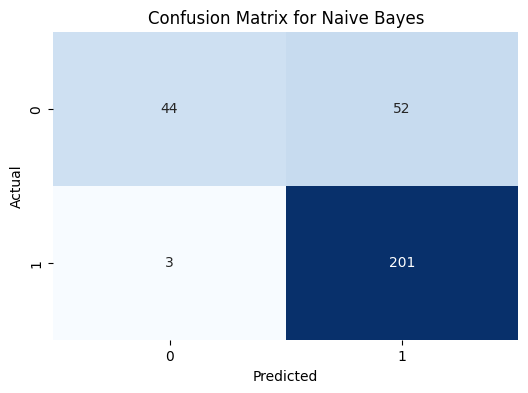

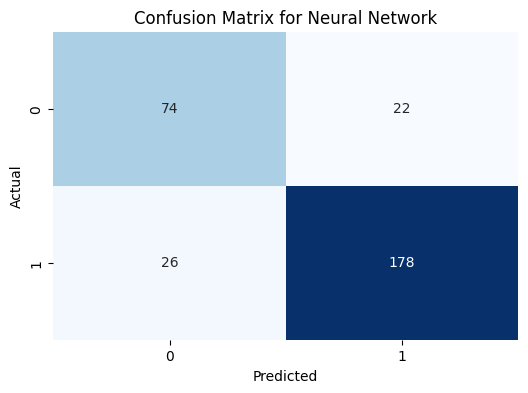

In [ ]:
conf_matrices = {
    'Logistic Regression': confusion_matrix(y_test, y_pred_lr),
    'Decision Tree': confusion_matrix(y_test, y_pred_tree),
    'Random Forest': confusion_matrix(y_test, y_pred_rf),
    'Naive Bayes': confusion_matrix(y_test, y_pred_nb),
    'Neural Network': confusion_matrix(y_test, y_pred_nn)
}

for model, conf_matrix in conf_matrices.items():
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {model}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
